# Tarea 1: Análisis de vibraciones

Nombre: josé Luis Cádiz Sejas

# Parte 1: Oil Analysis Improves Wind Turbine Gearbox Performance Part One

**Problema**: El correcto funcionamiento de las turbinas de los aerogeneradores depende principalmente de su caja de cambios, la cual contiene engranajes que requieren una especial atención para condiciones de extremas de operación (temperatura, ambiente etc). Bajo estas condiciones el análisis de aceites es una herramienta eficaz para predecir el estado de la máquina. 

Esto es de vital importancia debido a que en los engranajes ocurre un fenómeno llamado micropitting también conocido como rayado por fatiga, el cual es un daño superficial que ocurre en sistemas de alta carga y se caracteriza por la presencia de pequeños agujeros en la superficie, el cual podria terminar en macropitting, es decir en rotura de algún diente y el nivel de gravedad de este fenómeno es determinante según la calidad del aceite de los engranajes. 

**Metodología**: Para controlar el micropitting se debio controlar la velocidad de rodadura y la temperatura. Para la velocidad de rodadura se debio mantener un nivel mínimo de velocidad, debido a que aumenta la velocidad de entrada del lubricante, promoviendo la formación de películas y reduciendo la influencia del contacto de asperezas. En cuanto a la temperatura, la temperatura óptima de equilibrio se establece por el equilibrio entre el calor generado por la fricción y el calor disipado por conducción y convección. 

**Conclusiones y recomendaciones**: El micropitting se puede prevenir maximizando el espesor de la película, reduciendo la rugosidad de la superficie con recubrimiento
de los engranajes y optimizando las propiedades del lubricante evitando aditivos EP agresivos, manteniendo los niveles adecuados de limpieza del lubricante a lo largo de la vida útil y utilizando lubricantes con un bajo coeficiente de tracción.

Como recomendación se debe seleccionar el lubricante adecuado y mantener los engranajes limpios y secos. Finalmente se debe operar a una temperatura óptima.

# Parte 2

## Lectura de datos

In [88]:
import scipy.io as sio
from scipy.fftpack import fft, fftfreq
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math


DatosD=sio.loadmat('DatosD.mat') 
DatosN=sio.loadmat('DatosN.mat') 

In [89]:
# Señal N
XN=list(DatosN["x"][:,0])
Nt=list(DatosN["t"][0])
NN = len(XN)  # Número de datos
FsN=DatosN["Fs"][0][0]  # Frecuencia de muestreo
dtN = 1/FsN # Espaciado
print(len(XN))
print(len(Nt))
print(NN)
print(FsN)
print(dtN)

1998848
1998848
1998848
96000
1.0416666666666666e-05


In [90]:
# Señal D
XD=list(DatosD["x"][:,0])
Dt=list(DatosD["t"][0])
ND = len(XD)  # Número de datos
FsD=DatosD["Fs"][0][0]  # Frecuencia de muestreo
dtD = 1/FsD # Espaciado
print(len(XD))
print(len(Dt))
print(ND)
print(FsD)
print(dtD)

2195456
2195456
2195456
96000
1.0416666666666666e-05


In [91]:
# velocidad de rotores hz
nN=1060/60
nD=1049/60

# Parte a) Análisis de sistema inicial N

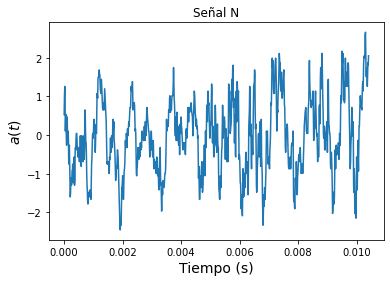

In [92]:
#grafica respuesta temporal N 
plt.plot(Nt[0:1000], XN[0:1000])
plt.xlabel('Tiempo (s)', fontsize=14)
plt.ylabel('$a(t)$', fontsize=14)
plt.title('Señal N')
plt.show()

**Para la revisión grafica de las señales temporales no se observa modulación por lo que se descarta realizar un analisis de envolvente.**

# Analisis de Fourier

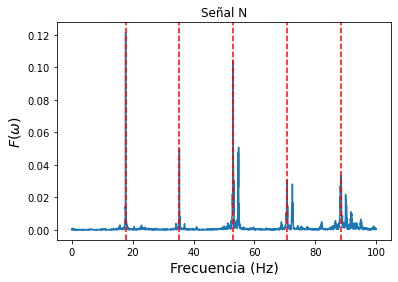

In [93]:
# Transformada de Fourier N
Y = fft(XN)[0:int(NN/2)]/(NN/2)
frq = fftfreq(NN,dtN)[0:int(NN/2)] #vector de frecuencias
df=pd.DataFrame({"modulo":abs(Y),"frecuencia":frq})
df_100=df[df["frecuencia"]<=100]
plt.plot(df_100["frecuencia"],df_100["modulo"])
plt.axvline(x=nN, color='r', linestyle='--')
plt.axvline(x=2*nN, color='r', linestyle='--')
plt.axvline(x=3*nN, color='r', linestyle='--')
plt.axvline(x=4*nN, color='r', linestyle='--')
plt.axvline(x=5*nN, color='r', linestyle='--')
plt.xlabel('Frecuencia (Hz)', fontsize=14)
plt.ylabel('$F(\omega)$', fontsize=14)
plt.title('Señal N')
plt.show()

**Si bien es claro que frecuencias resaltan del espectro, se procede a calcular
el espectro por intervalo para luego obtener el promedio, con el objetivo de visualizar las frecuencias predominantes de mejor forma.**

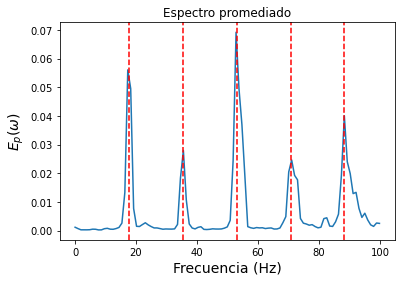

In [95]:
# señal N
L=100000 #largo de los segmentos
l=0 #overlap 
N=NN 
Ns=math.floor((N-l)/(L-l))

Ep=np.zeros((int(L/2),))

for i in range(1,Ns+1):
    inicio=(i-1)*L-(i-1)*l
    fin=i*L-(i-1)*l
    window = signal.windows.hann(L)
    av=XN[inicio:fin]*window #segmento de datos con ventana
    e = fft(av)[0:int(L/2)]/(L/2)
    Ep=Ep+abs(e)/Ns

dt=Nt[1]-Nt[0]    
frq = fftfreq(L,dt)[0:int(L/2)]

df=pd.DataFrame({"modulo":Ep,"frecuencia":frq})
df_100=df[df["frecuencia"]<=100]
plt.plot(df_100["frecuencia"],df_100["modulo"])
plt.axvline(x=nN, color='r', linestyle='--')
plt.axvline(x=2*nN, color='r', linestyle='--')
plt.axvline(x=3*nN, color='r', linestyle='--')
plt.axvline(x=4*nN, color='r', linestyle='--')
plt.axvline(x=5*nN, color='r', linestyle='--')
plt.xlabel('Frecuencia (Hz)', fontsize=14)
plt.ylabel('$E_p(\omega)$', fontsize=14)
plt.title('Espectro promediado')
plt.show()

**De la figura se observa que existe frecuencias anomalas 1X, 2X, 3X, 4X y 5X, predominando principalmente 1X, 3X y 5X, por lo que se espera que haya una falla relacionada a un ajuste inadecuado de rodamientos,roce o incluso resonancia al ser el 3X mayor al 1X, descartandose fallas asociado a fuerzas hidraulicas y fallas en rodamientos debido a la no aparición de frecuencias predominantes diferentes a armonicos de la frecuencia de giro de la máquina.**

# Parte b) Análisis sistema D, comparación e interpretación de resultados.

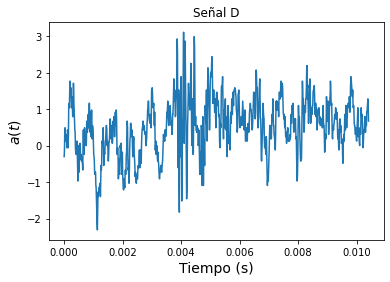

In [96]:
#grafica respuesta temporal D
plt.plot(Dt[0:1000], XD[0:1000])
plt.xlabel('Tiempo (s)', fontsize=14)
plt.ylabel('$a(t)$', fontsize=14)
plt.title('Señal D')
plt.show()

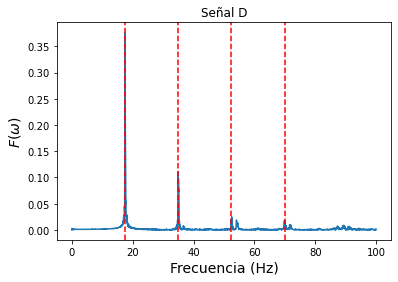

In [97]:
# Transformada de Fourier D
Y = fft(XD)[0:int(ND/2)]/(ND/2)
frq = fftfreq(ND,dtD)[0:int(ND/2)] #vector de frecuencias
df=pd.DataFrame({"modulo":abs(Y),"frecuencia":frq})
df_100=df[df["frecuencia"]<=100]
plt.plot(df_100["frecuencia"],df_100["modulo"])
plt.axvline(x=nD, color='r', linestyle='--')
plt.axvline(x=2*nD, color='r', linestyle='--')
plt.axvline(x=3*nD, color='r', linestyle='--')
plt.axvline(x=4*nD, color='r', linestyle='--')
plt.xlabel('Frecuencia (Hz)', fontsize=14)
plt.ylabel('$F(\omega)$', fontsize=14)
plt.title('Señal D')
plt.show()

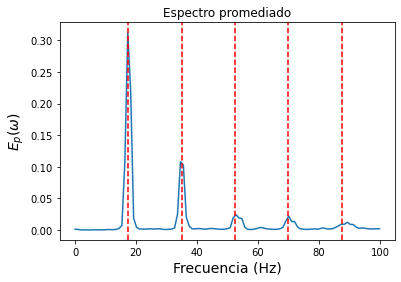

In [98]:
# señal D
L=100000 #largo de los segmentos
l=0 #overlap 
N=ND 
Ns=math.floor((N-l)/(L-l))

Ep=np.zeros((int(L/2),))

for i in range(1,Ns+1):
    inicio=(i-1)*L-(i-1)*l
    fin=i*L-(i-1)*l
    window = signal.windows.hann(L)
    av=XD[inicio:fin]*window #segmento de datos con ventana
    e = fft(av)[0:int(L/2)]/(L/2)
    Ep=Ep+abs(e)/Ns

dt=Dt[1]-Dt[0]    
frq = fftfreq(L,dt)[0:int(L/2)]

df=pd.DataFrame({"modulo":Ep,"frecuencia":frq})
df_100=df[df["frecuencia"]<=100]
plt.plot(df_100["frecuencia"],df_100["modulo"])
plt.axvline(x=nD, color='r', linestyle='--')
plt.axvline(x=2*nD, color='r', linestyle='--')
plt.axvline(x=3*nD, color='r', linestyle='--')
plt.axvline(x=4*nD, color='r', linestyle='--')
plt.axvline(x=5*nD, color='r', linestyle='--')
plt.xlabel('Frecuencia (Hz)', fontsize=14)
plt.ylabel('$E_p(\omega)$', fontsize=14)
plt.title('Espectro promediado')
plt.show()

**De la figura se observa que existe frecuencias anomalas 1X, 2X, 3X, 4X y 5X, siendo la 3X, 4X y 5X mucho menores respecto del 1X y 2X, al predominar 1X y 2X se espera que la falla este asociada a un desbalance de eje doblado o desalineamiento.**

**La señal D al igual que la señal N presentan vibraciones anomalas, pero en la D predomina el 1X y en la señal N predomina el 3X, aparenciendo incluso 4X y 5X, por lo que se puede decir que la falla en la señal N es más severa que la falla de la señal D.**

**Finalmente, se interpreta que la señal N es la que esta asociada a la turbina sin un alabe, ya que esto podría provocar que las propiedades físicas de la máquina cambien, con esto modificando el valor de la frecuencia natural del sistema, la cual podria haber entrado en resonancia con  la velocidad de operación, lo que explicaría el hecho de que el 3X sea mayor que el 1X. De este modo, el caso con todos los alabes correspondería con la señal D.**